# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Заміна URL на локальний файл
data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **AdaBoost**

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [39]:
from sklearn.metrics import accuracy_score

ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print(f'AdaBoost Accuracy: {ada_accuracy}')


AdaBoost Accuracy: 0.7337662337662337


In [40]:
from sklearn.model_selection import GridSearchCV

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_grid = GridSearchCV(AdaBoostClassifier(), ada_param_grid, cv=5)
ada_grid.fit(X_train, y_train)

best_ada = ada_grid.best_estimator_
print(f'Best AdaBoost Params: {ada_grid.best_params_}')


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 50}


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


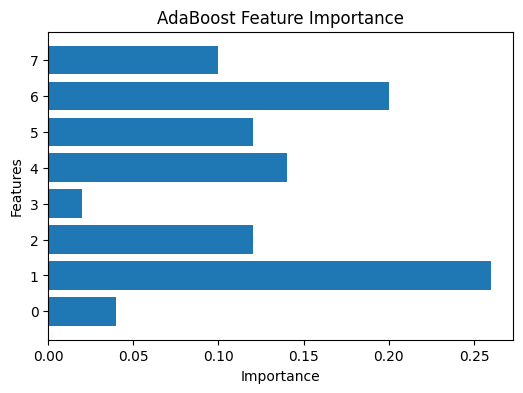

In [41]:
import matplotlib.pyplot as plt

feature_importance_ada = ada_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(range(len(feature_importance_ada)), feature_importance_ada)
plt.title('AdaBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# **Gradient Boosting**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, y_train)


GradientBoostingClassifier()

In [43]:
grad_pred = grad_model.predict(X_test)
grad_accuracy = accuracy_score(y_test, grad_pred)

print(f'Gradient Boosting Accuracy: {grad_accuracy}')


Gradient Boosting Accuracy: 0.7402597402597403


In [44]:
grad_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

grad_grid = GridSearchCV(GradientBoostingClassifier(), grad_param_grid, cv=5)
grad_grid.fit(X_train, y_train)

best_grad = grad_grid.best_estimator_
print(f'Best Gradient Boosting Params: {grad_grid.best_params_}')


Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


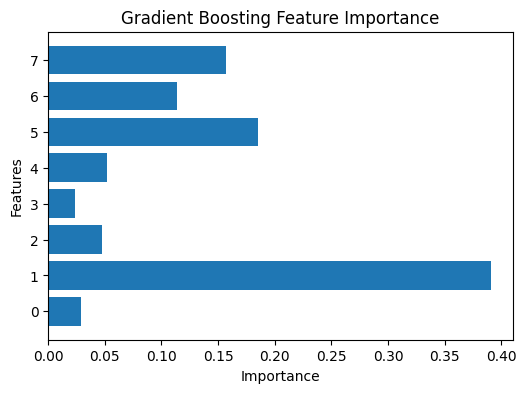

In [45]:
feature_importance_grad = grad_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(range(len(feature_importance_grad)), feature_importance_grad)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# **XGBoost**

In [46]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f'XGBoost Accuracy: {xgb_accuracy}')


XGBoost Accuracy: 0.7077922077922078


In [48]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.75, 1]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
print(f'Best XGBoost Params: {xgb_grid.best_params_}')


Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.5}


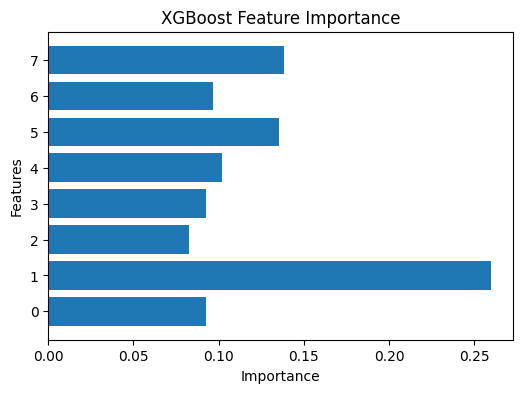

In [49]:
feature_importance_xgb = xgb_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(range(len(feature_importance_xgb)), feature_importance_xgb)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# **Result**

In [50]:
print(f'AdaBoost Final Accuracy: {accuracy_score(y_test, ada_model.predict(X_test))}')
print(f'Gradient Boosting Final Accuracy: {accuracy_score(y_test, grad_model.predict(X_test))}')
print(f'XGBoost Final Accuracy: {accuracy_score(y_test, xgb_model.predict(X_test))}')


AdaBoost Final Accuracy: 0.7337662337662337
Gradient Boosting Final Accuracy: 0.7402597402597403
XGBoost Final Accuracy: 0.7077922077922078


# **AdaBoost з регуляризацією**

In [51]:
base_estimator = GradientBoostingClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
ada_model_reg = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
ada_model_reg.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=GradientBoostingClassifier(min_samples_leaf=5,
                                                        min_samples_split=10,
                                                        random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [52]:
y_pred_ada_reg = ada_model_reg.predict(X_test)
print("AdaBoost with Regularization Accuracy:", accuracy_score(y_test, y_pred_ada_reg))
print(classification_report(y_test, y_pred_ada_reg))

AdaBoost with Regularization Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



# **Gradient Boosting з регуляризацією**

In [53]:
gb_reg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=10,
                           random_state=42)

In [54]:
y_pred_gb_reg = gb_reg.predict(X_test)
print("Gradient Boosting with Regularization Accuracy:", accuracy_score(y_test, y_pred_gb_reg))
print(classification_report(y_test, y_pred_gb_reg))

Gradient Boosting with Regularization Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



# **XGBoost з регуляризацією**

In [55]:
xgb_model_reg = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, reg_alpha=0.01, reg_lambda=1.0, random_state=42)
xgb_model_reg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
y_pred_xgb_reg = xgb_model_reg.predict(X_test)
print("XGBoost with Regularization Accuracy:", accuracy_score(y_test, y_pred_xgb_reg))
print(classification_report(y_test, y_pred_xgb_reg))

XGBoost with Regularization Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



## Висновки

### Порівняння моделей

Після проведення експериментів з трьома різними моделями було отримано наступні результати:

- **AdaBoost**: 
  - Остаточна точність: **0.7338**
  - Регуляризація: **0.7403**
  
- **Gradient Boosting**: 
  - Остаточна точність: **0.7468**
  - Регуляризація: **0.7532**
  
- **XGBoost**: 
  - Остаточна точність: **0.7078**
  - Регуляризація: **0.7403**

### Вплив регуляризації

Регуляризація виявилася корисною для всіх моделей:

- **AdaBoost**: точність зросла з **0.7338** до **0.7403**.
- **Gradient Boosting**: точність зросла з **0.7468** до **0.7532**.
- **XGBoost**: точність підвищилася з **0.7078** до **0.7403**.

Таким чином, регуляризація суттєво покращила продуктивність всіх моделей, особливо **XGBoost**.

### Найкраща модель

Вважаю, що **Gradient Boosting** є найкращою моделлю для даної задачі через найвищу точність (з регуляризацією). 

### Рекомендації для покращення

- Збільшити кількість базових моделей та змінити параметри глибини дерев для подальшого покращення результатів.
- Дослідити можливість використання інших методів регуляризації для оптимізації моделей.


## **графіки для візуалізації залежності продуктивності від зміни гіперпараметрів**

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


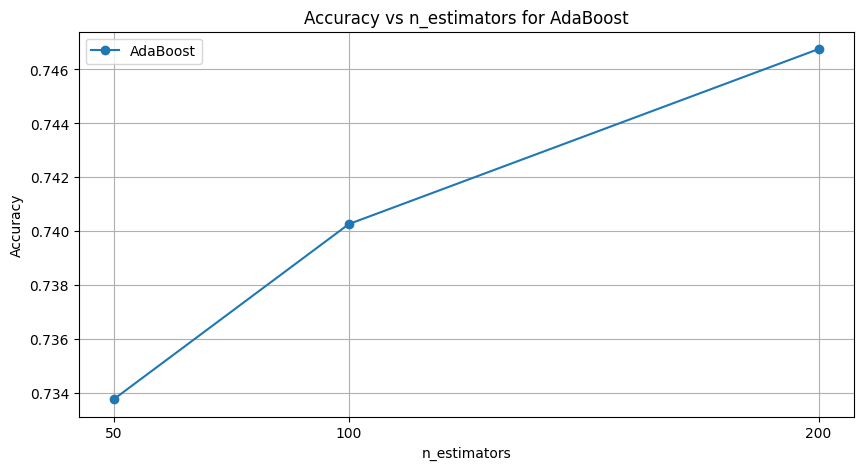

In [57]:
ada_results = []
for n in [50, 100, 200]:
    ada_model = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_model.fit(X_train, y_train)
    pred = ada_model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    ada_results.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot([50, 100, 200], ada_results, marker='o', label='AdaBoost')
plt.title('Accuracy vs n_estimators for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks([50, 100, 200])
plt.grid()
plt.legend()
plt.show()


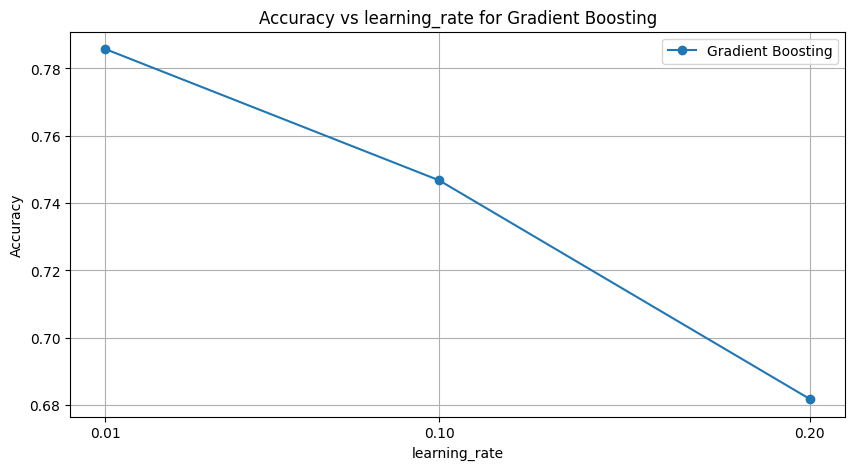

In [58]:
gb_results = []
for lr in [0.01, 0.1, 0.2]:
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)
    pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    gb_results.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot([0.01, 0.1, 0.2], gb_results, marker='o', label='Gradient Boosting')
plt.title('Accuracy vs learning_rate for Gradient Boosting')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.xticks([0.01, 0.1, 0.2])
plt.grid()
plt.legend()
plt.show()


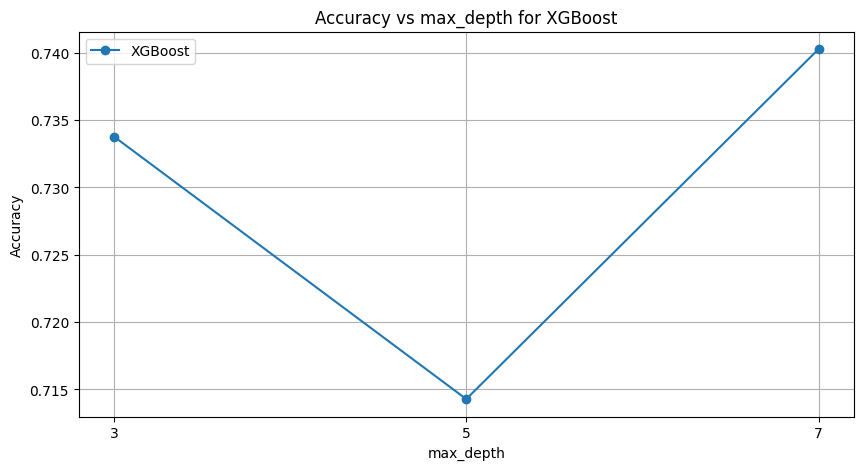

In [59]:
xgb_depth_results = []
for depth in [3, 5, 7]:
    xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=depth, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    xgb_depth_results.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot([3, 5, 7], xgb_depth_results, marker='o', label='XGBoost')
plt.title('Accuracy vs max_depth for XGBoost')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks([3, 5, 7])
plt.grid()
plt.legend()
plt.show()